## An Explanatory data analysis of mobile phone users.

# **Introduction**
---

## Overview
In today’s digital world, mobile usage has significantly increased, leading to a massive demand for data-driven insights. Telecom companies need to understand customer behavior, optimize their services, and improve user experiences. This project focuses on analyzing a dataset containing mobile device usage patterns to extract meaningful insights for a telecom company "Deutsche telekom".

## Objective
The primary goal of this analysis is to explore how users interact with their mobile devices, identify trends in data consumption, screen time, and battery usage, and derive actionable recommendations for the telecom company "Deutsche telekom". By leveraging Exploratory Data Analysis techniques, I aim to answer key business questions that can drive customer satisfaction, targeted marketing, and better network resource management.

# **Business Context**
---

My client is a telecom company Deutsche telekom. They provide mobile network services, internet plans, and customer analytics. They have collected this dataset to better understand user behavior and optimize their services.
The company is particularly interested in the following business questions mentioned below.

# **Business Questions**
---

1. Which factors contribute the most to extreme data usage?
2. How does mobile data consumption vary across different age groups?
3. Does the operating system (Android vs. iOS) affect mobile data usage and battery drain?
4. Do male and female users show different data consumption and screen-on time patterns?
5. Do users with higher app usage time tend to consume more data?
6. Do users with more installed apps tend to use more data?



# **Data Overview & Exploration**
---

The dataset is used from public source Kaggle.com and the link to dataset is :
https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset

This dataset provides a comprehensive analysis of mobile device usage patterns and user behavior classification. It contains 700 samples of user data, including metrics such as app usage time, screen-on time, battery drain, and data consumption. Each entry is categorized into one of five user behavior classes, ranging from light to extreme usage, allowing for insightful analysis and modeling.

### Importing all necessary libraries.

In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("/content/user_behavior_dataset.csv")

Data set has been loaded, lets start with the Data exploration part now.


In [39]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [40]:
df.shape

(700, 11)

In [41]:
df.dtypes

,0
User ID,int64
Device Model,object
Operating System,object
App Usage Time (min/day),int64
Screen On Time (hours/day),float64
Battery Drain (mAh/day),int64
Number of Apps Installed,int64
Data Usage (MB/day),int64
Age,int64
Gender,object


I have used these functions to get an basic idea of what our data set consists of.

Here is an short explanation of the features in the data set.
1. User ID: Unique identifier for each user.
2. Device Model: Model of the user's smartphone.
3. Operating System: The OS of the device (iOS or Android).
4. App Usage Time: Daily time spent on mobile applications, measured in minutes.
5. Screen On Time: Average hours per day the screen is active.
6. Battery Drain: Daily battery consumption in mAh.
7. Number of Apps Installed: Total apps available on the device.
8. Data Usage: Daily mobile data consumption in megabytes.
9. Age: Age of the user.
10. Gender: Gender of the user (Male or Female).
11. User Behavior Class: Classification of user behavior based on usage patterns (1 to 5).




In [42]:
df.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


In [43]:
df.duplicated().sum()

np.int64(0)

I have use isnull() and duplicated() functions to if there any null or duplicate values in the data set.
And as we can see the data set has non of them.

# Exploratory Data Analysis

Now, let’s analyze the dataset and answer each business question

Q1. Which factors contribute the most to extreme data usage?

---
We want to analyze what factors influence extreme data consumption. To do this, I have Checked correlations between Data Usage and other numerical variables by ploating heatmap. why heat map, because it is used to represent more common values or higher activities brighter colors basically reddish colors are used and to represent less common or activity values, darker colors are preferred. Heatmaps in Seaborn can be plotted by using the seaborn.heatmap() function.

Comparing behaviors of extreme data users (User Behavior Class = 5) vs. others with the help of boxplot. In the box plot, a box is created from the first quartile to the third quartile, a vertical line is also there which goes through the box at the median. Here x-axis denotes the User Behavior Class to be plotted while the y-axis shows the frequency distribution of Data usage.

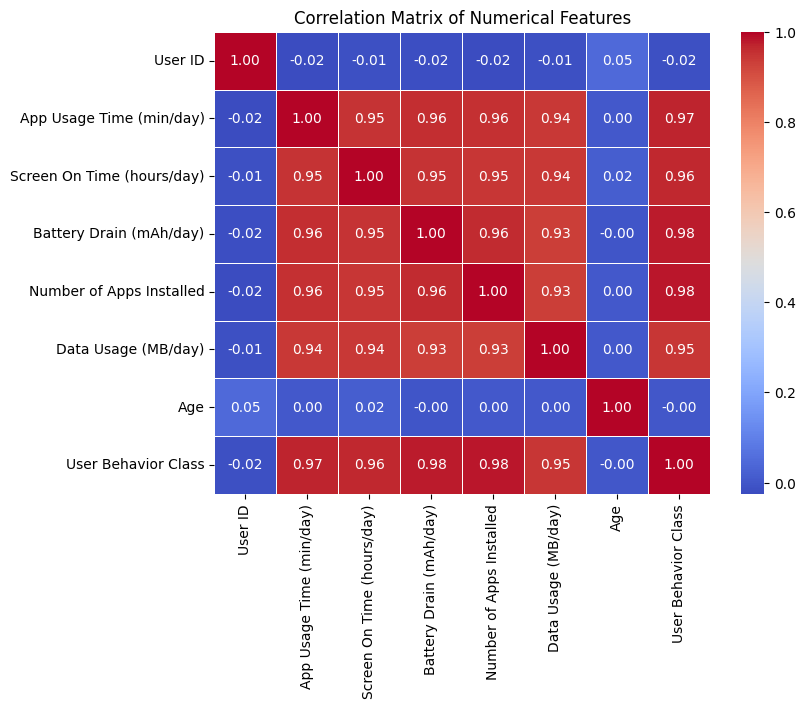

In [44]:
numerical_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In the heat map you can see a strong correlation (values near +1 or -1) suggests a meaningful relationship. If Data Usage strongly correlates with Screen-On Time and App Usage Time, it indicates that users who spend more time on their devices consume more data. We can also see that, number of installed apps also has an impact on data usage.


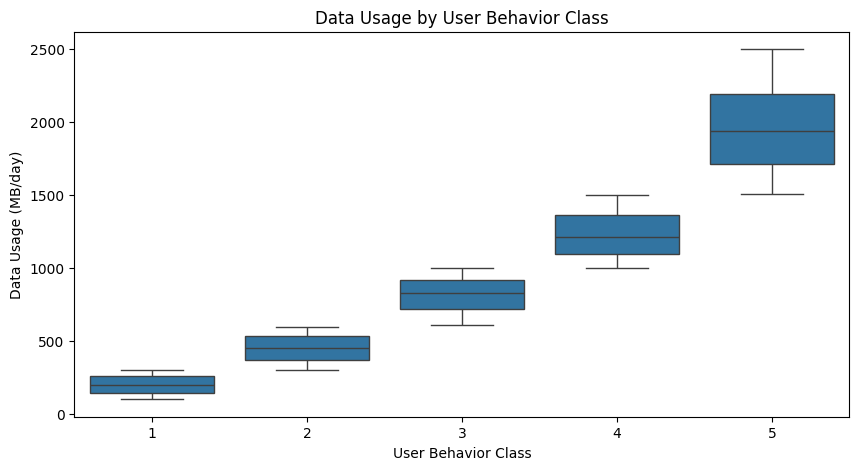

In [45]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["User Behavior Class"], y=df["Data Usage (MB/day)"])
plt.title("Data Usage by User Behavior Class")
plt.show()

If Class 5 users show significantly higher median data usage and outliers, it confirms that their usage patterns differ from each others. The presence of extreme values (outliers) suggests a subset of users consuming disproportionate amounts of data.

Q2. How does mobile data consumption vary across different age groups?

---


For this business question I have categorize users into age groups (Under 20', '20-30', '30-40', 'Over 40). After that, I analyze which group consumes the most mobile data. For this I have used Pie chart.

In [46]:
minimum = df['Age'].min()
maximum = df['Age'].max()
print(f"Minimum: {minimum}")
print(f"Maximum: {maximum}")

Minimum: 18
Maximum: 59


This will help us understand max and min age in the data set.

<ipython-input-47-538bb6237908>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_data_usage = df.groupby('Age_Group')['Data Usage (MB/day)'].sum()


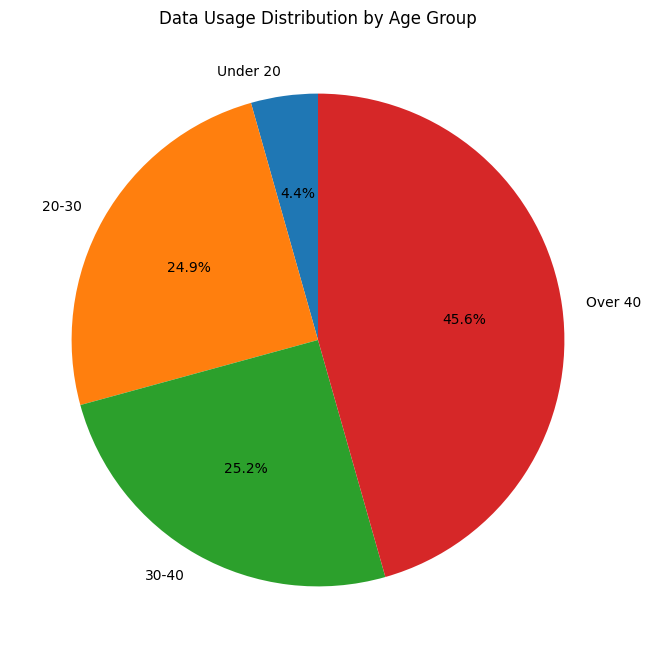

In [47]:
age_bins = [18, 20, 30, 40, 60]
age_labels = ['Under 20', '20-30', '30-40', 'Over 40']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
age_group_data_usage = df.groupby('Age_Group')['Data Usage (MB/day)'].sum()
plt.figure(figsize=(8, 8))
plt.pie(age_group_data_usage, labels=age_group_data_usage.index, autopct='%1.1f%%', startangle=90)
plt.title('Data Usage Distribution by Age Group')
plt.show()

So here after using Pie chart we are able to see that, users from 40 to 59 have used more data then other groups. But if we combibe both 20 to 30 and 30 to 40 age group users we will get an best age group segment to target as they use more data then other all age groups combine.

Q3. Does the operating system (Android vs. iOS) affect mobile data usage and battery drain?

---

To compare both Data usage and battery consubtion in operating systems, I will use Barplot chart. The reson behind it is that, it is the simplest way to compare two features and yet is very effective and esay to read.

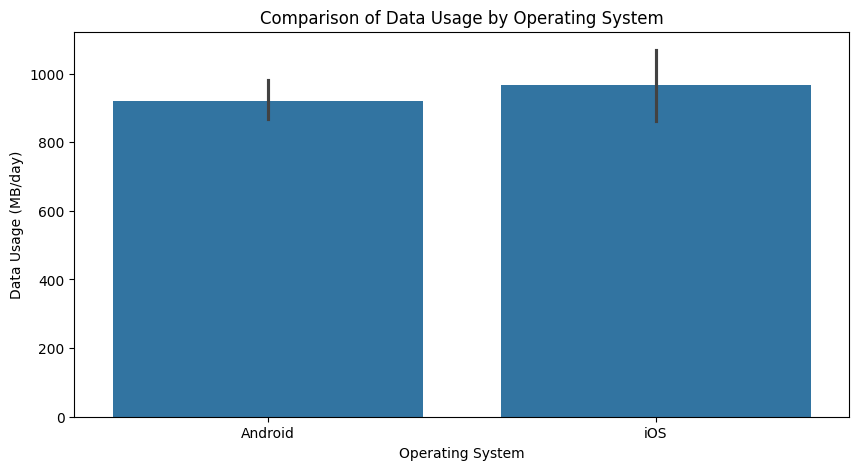

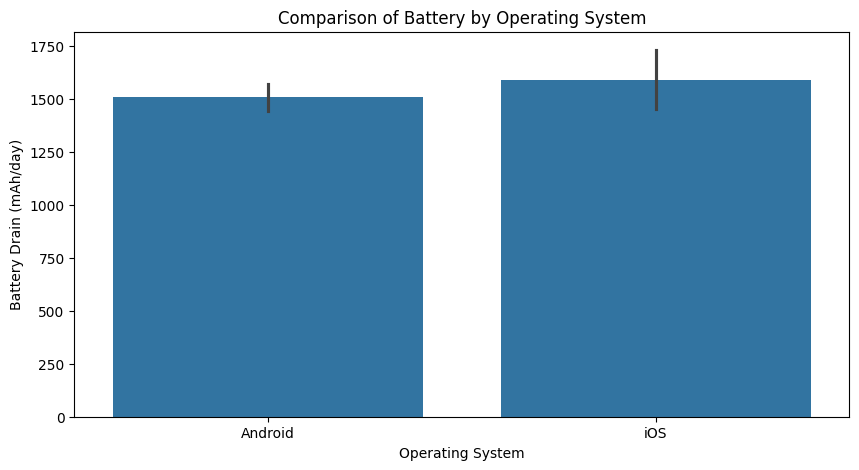

In [48]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Operating System", y="Data Usage (MB/day)", data=df)
plt.title("Comparison of Data Usage by Operating System")
plt.xticks(ticks=[0, 1])
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x="Operating System", y="Battery Drain (mAh/day)", data=df)
plt.title("Comparison of Battery by Operating System")
plt.xticks(ticks=[0, 1])
plt.show()


Based on the findings of this two graphs we can say that, they compare averages and show platform-based differences in usage. we can clearly see that there is not a great difference between both the Operating Systems and more over they are same in both the terms (Battery Drain & Data Usage).

Q4. Do male and female users show different data consumption and screen-on time patterns?

---

In order to target any spesific gender for marketing could be a good taktic. lets see if there any deffrence in the data usage and screen time. I am using Barplot chart to analysis this business question.

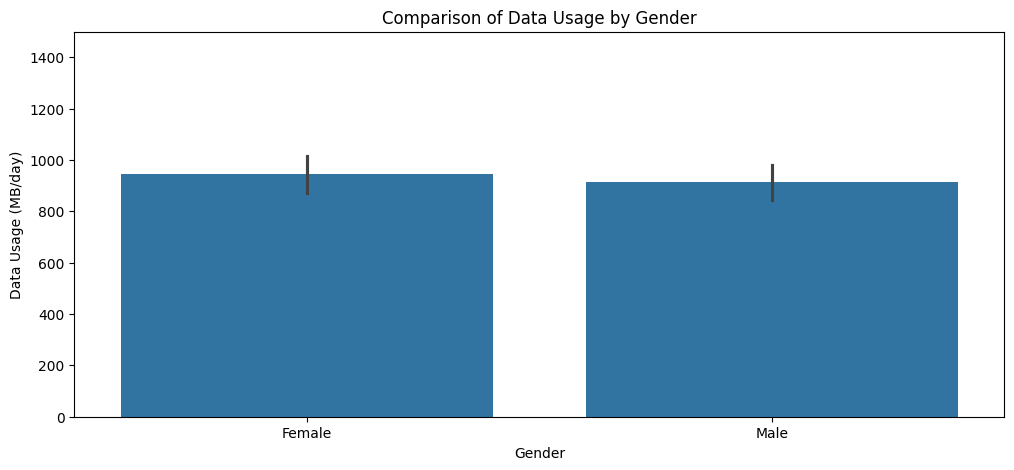

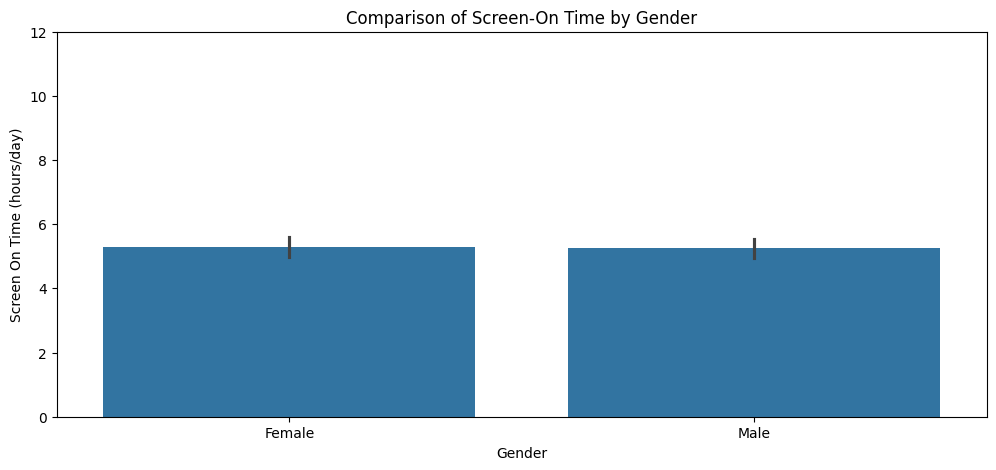

In [49]:
plt.figure(figsize=(12, 5))
sns.barplot(x="Gender", y="Data Usage (MB/day)", data=df)
plt.title("Comparison of Data Usage by Gender")
plt.xticks(ticks=[0, 1], labels=["Female", "Male"])
plt.ylim(top=1500)
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x="Gender", y="Screen On Time (hours/day)", data=df)
plt.title("Comparison of Screen-On Time by Gender")
plt.xticks(ticks=[0, 1], labels=["Female", "Male"])
plt.ylim(top=12)
plt.show()


well it is clear that there is only slight diffrence between male and female. so it is safe to say that gender plays no role in data usage and screen time.

Q5. Do users with higher app usage time tend to consume more data?

---

For this I am using Regression Line on Scatter Plot.

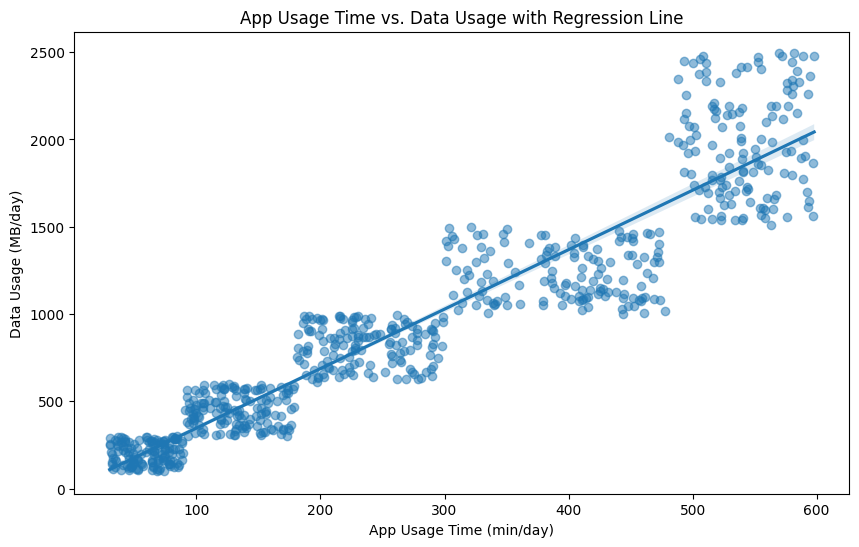

In [50]:
plt.figure(figsize=(10, 6))
sns.regplot(x='App Usage Time (min/day)', y='Data Usage (MB/day)', data=df, scatter_kws={'alpha':0.5})
plt.title('App Usage Time vs. Data Usage with Regression Line')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Data Usage (MB/day)')
plt.show()

The regression plot suggests a positive correlation between App Usage Time and Data Usage. This means that users who use apps for longer durations generally tend to consume more mobile data, but exceptions may exist based on app type and background data usage settings.

Q6. Do users with more installed apps tend to use more data?

---

This question is similar to Q5 so I am using same method to answer it Regression Line on Scatter Plot.

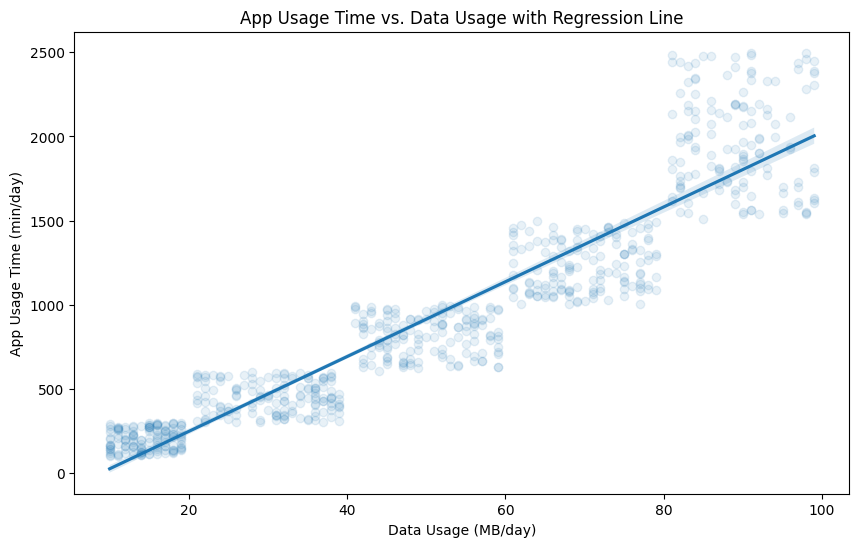

In [51]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Number of Apps Installed', y='Data Usage (MB/day)', data=df, scatter_kws={'alpha':0.1})
plt.title('App Usage Time vs. Data Usage with Regression Line')
plt.xlabel('Data Usage (MB/day)')
plt.ylabel('App Usage Time (min/day)')
plt.show()

The regression plot suggests a correlation between Number of Apps Installed and Data Usage (MB/day). This indicates that while having more apps may contribute to higher data consumption, other factors like app type, usage habits, and background data settings also play a significant role.

# Conclusion

---

This exploratory data analysis has provided valuable insights into mobile device usage patterns and user behavior. Based on the findings, we can draw the following key conclusions:

Factors Contributing to Extreme Data Usage: Screen-on time, app usage time, and the number of installed apps are strongly correlated with data usage. Users in the "Extreme" behavior class exhibit significantly higher data consumption compared to other classes.

Data Consumption Across Age Groups: The 40-59 age group demonstrates the highest overall data usage. However, the combined data consumption of the 20-30 and 30-40 age groups surpasses that of the 40-59 group, making them a potentially valuable target segment.
Operating System and Usage: There's minimal difference in data usage and battery drain between Android and iOS users.

Gender-Based Usage: Gender does not appear to be a significant factor in data consumption or screen-on time.
App Usage and Data Consumption: A positive correlation exists between app usage time and data usage. Users who spend more time on apps tend to consume more data.

Installed Apps and Data Consumption: A correlation is also observed between the number of installed apps and data usage, although other factors influence this relationship.

Age-Based Segmentation: Since the 20-40 age group shows the highest potential for data consumption, tailor marketing campaigns specifically to their interests and preferences. Consider offering data bundles, app discounts, or exclusive content that resonates with this demographic. Personalized Recommendations: Leverage data analytics to understand individual user behavior and offer personalized app or content recommendations. This can drive engagement and data usage. Location-Based Targeting: Identify areas with high data consumption and focus marketing efforts in those locations to maximize reach and impact.